# Excercise 5

## Myokyung Han (20224230)

In [1]:
import pandas as pd
from pandas.tseries.offsets import YearEnd

$$
    \text{Real XR} = \frac{S^{PPP}}{S}
$$

$$
    \text{Real XR} = \frac{S}{S^{PPP}}
$$

In [2]:
# update frequncy is low
# 2021의 데이터가 없다....

# 직접 real exchange rate을 구한다.


$$
    S^{PPP} = \frac{{P(X)}}{P(USD)}
$$

In [3]:
## PPP는 유동성이 적으므로 다운받고 market exchange는 daily로 받는다. 

In [4]:
pd.read_excel('./data/world_ppp_xr.xls')
# .head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2022-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
3,Aruba,ABW,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,1.302941,1.317801,1.285141,1.308843,1.362318,1.355045,1.350690,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.326939,0.330216,0.332721,0.339622,0.339128,0.339378,0.340077,0.337082,0.334359,0.334940
265,"Yemen, Rep.",YEM,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,81.476761,88.792992,93.631317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,South Africa,ZAF,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,4.776628,5.107817,5.295738,5.571891,5.825256,6.159093,6.426701,6.524324,6.698308,6.967552
267,Zambia,ZMB,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,2.446346,2.651491,2.832861,3.064822,3.366482,3.878827,4.192580,4.397728,4.650410,5.226549


In [5]:
def load_deepsearch_data(filepath, column):
    df = pd.read_excel(filepath)
    df['날짜'] = pd.to_datetime(df['날짜'])
    df = df.set_index('날짜')
    df.columns = [column]
    
    return df
    

In [6]:
df_xr = load_deepsearch_data('./data/krw_usd_xr.xlsx', 'KRW/USD')

In [7]:
df_monthly = df_xr.resample('M').last()

In [8]:
df_monthly = df_monthly.loc['1998-12-31':]

In [9]:
df_monthly.head()

,KRW/USD
날짜,
1998-12-31,1207.8
1999-01-31,1175.3
1999-02-28,1222.4
1999-03-31,1224.7
1999-04-30,1176.4


In [10]:
def load_world_bank_data(filepath, column):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    
    df = df.set_index('Country Code')
    df = df.loc['KOR'].to_frame()
    
    df = df.iloc[3:]
    df.dropna(inplace=True)
    df['KOR'] = df['KOR'].astype(float)
    df['date'] = pd.to_datetime(df.index)+YearEnd(0)
    df.set_index('date', inplace=True)
    df.columns = [column]
    return df
      
    

In [11]:
df_real_xr = load_world_bank_data('./data/world_real_xr.xls', 'Real XR')

In [12]:
df_ppp_xr = load_world_bank_data('./data/world_ppp_xr.xls', 'PPP XR')

In [13]:
df_ppp_xr.head(3)

,PPP XR
date,
1990-12-31,559.920181
1991-12-31,591.112647
1992-12-31,622.893976


In [14]:
df_ppp_xr.tail(3)

,PPP XR
date,
2018-12-31,854.871397
2019-12-31,864.630567
2020-12-31,824.604924


## Merge dataframes

In [15]:
df_merged = df_monthly.join(df_real_xr)

In [16]:
df_merged= df_merged.join(df_ppp_xr)

In [17]:
df_ppp_xr

,PPP XR
date,
1990-12-31,559.920181
1991-12-31,591.112647
1992-12-31,622.893976
1993-12-31,646.528116
1994-12-31,684.657732
1995-12-31,717.702429
1996-12-31,733.769744
1997-12-31,750.208045
1998-12-31,775.063070


In [18]:
df_ppp_xr

,PPP XR
date,
1990-12-31,559.920181
1991-12-31,591.112647
1992-12-31,622.893976
1993-12-31,646.528116
1994-12-31,684.657732
1995-12-31,717.702429
1996-12-31,733.769744
1997-12-31,750.208045
1998-12-31,775.063070


In [19]:
df_merged.head()

,KRW/USD,Real XR,PPP XR
날짜,,,
1998-12-31,1207.8,0.553048,775.06307
1999-01-31,1175.3,NaN,NaN
1999-02-28,1222.4,NaN,NaN
1999-03-31,1224.7,NaN,NaN
1999-04-30,1176.4,NaN,NaN


In [20]:
df_merged.tail()

,KRW/USD,Real XR,PPP XR
날짜,,,
2021-12-31,1185.5,NaN,NaN
2022-01-31,1202.4,NaN,NaN
2022-02-28,1202.7,NaN,NaN
2022-03-31,1210.8,NaN,NaN
2022-04-30,1216.7,NaN,NaN


In [21]:
df_ppp_xr.head()

,PPP XR
date,
1990-12-31,559.920181
1991-12-31,591.112647
1992-12-31,622.893976
1993-12-31,646.528116
1994-12-31,684.657732


In [22]:
import matplotlib.pyplot as plt

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)

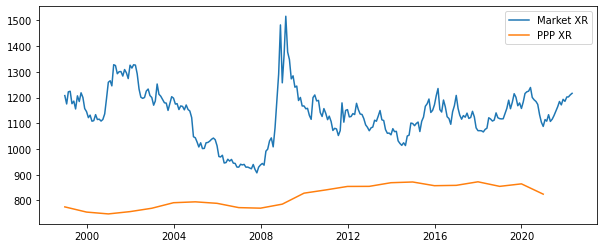

In [24]:
plt.plot(df_merged['KRW/USD'], label = 'Market XR')
plt.plot(df_merged['PPP XR'].dropna(), label = 'PPP XR')
plt.legend()
plt.show()

In [25]:
df_merged['PPP XR'] = df_merged['PPP XR'].fillna(method='ffill')

In [26]:
df_merged['New Real XR'] = \
    df_merged['PPP XR']/df_merged['KRW/USD']
#>> 헐 이미 반대로 계산했었네...원래는 

In [27]:
df_merged.head()

,KRW/USD,Real XR,PPP XR,New Real XR
날짜,,,,
1998-12-31,1207.8,0.553048,775.06307,0.641715
1999-01-31,1175.3,NaN,775.06307,0.659460
1999-02-28,1222.4,NaN,775.06307,0.634050
1999-03-31,1224.7,NaN,775.06307,0.632860
1999-04-30,1176.4,NaN,775.06307,0.658843


In [28]:
df_merged['Real XR'] = df_merged['Real XR'].fillna(method='ffill')

In [29]:
df_merged

,KRW/USD,Real XR,PPP XR,New Real XR
날짜,,,,
1998-12-31,1207.8,0.553048,775.063070,0.641715
1999-01-31,1175.3,0.553048,775.063070,0.659460
1999-02-28,1222.4,0.553048,775.063070,0.634050
1999-03-31,1224.7,0.553048,775.063070,0.632860
1999-04-30,1176.4,0.553048,775.063070,0.658843
...,...,...,...,...
2021-12-31,1185.5,0.698660,824.604924,0.695576
2022-01-31,1202.4,0.698660,824.604924,0.685799
2022-02-28,1202.7,0.698660,824.604924,0.685628


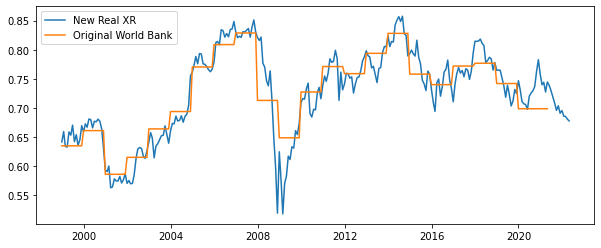

In [30]:
plt.plot(df_merged['New Real XR'], label = 'New Real XR')
plt.plot(df_merged['Real XR'].shift(-12), label = 'Original World Bank')
plt.legend()
plt.show()

### Compute annual returns in the currency market

In [ ]:
df_merged['ann_ret'] = \
    df_merged['KRW/USD'].pct_change(periods=12)*100

In [ ]:
df_merged['F12.ann_ret'] = \
    df_merged['ann_ret'].shift(-12)

In [ ]:
df_merged.head(15)

### Use OLS!!!

In [ ]:
import statsmodels.api as sm

In [ ]:
df = df_merged[['New Real XR', 'F12.ann_ret']]
df = df.dropna()

In [ ]:
X = df['New Real XR']
X = sm.add_constant(X)

In [ ]:
Y = df['F12.ann_ret']

In [ ]:
model = sm.OLS(Y,X)

In [ ]:
results = model.fit()

In [ ]:
results.summary()

## Forecast XR

$$
y = \alpha + \beta x
$$

$$
\text{ret}_{t, t+12} = \alpha + \beta \, \text{Real XR}_t +\epsilon
$$

In [ ]:
results.params

In [ ]:
dir(results)

In [ ]:
results.params

In [ ]:
last_obs = df_merged.iloc[-1]

In [ ]:
last_xr = last_obs['KRW/USD']
last_year_xr = last_obs['New Real XR']

In [ ]:
last_xr

In [ ]:
last_year_xr

### method 1: simple , straightfoward, stupid

In [ ]:
alpha = results.params['const']
beta = results.params['New Real XR']

In [ ]:
alpha+beta*last_year_xr

### method 2: numpy 

In [ ]:
import numpy as np

In [ ]:
exog = [1, last_year_xr]

In [ ]:
np.dot(results.params, exog)

### method 3: predict

In [ ]:
results.predict(exog = exog)

In [ ]:
help(results.predict)

### confidence interval of our predictions

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
wls_prediction_std(results, exog = exog, alpha=0.05)

# alpha 0.05 >> 95% ...,,,,,,,,...

# predicted stdev, interval - lower, interval - upper 

In [ ]:
type(exog)

In [ ]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.2f} % ~ {:.2f}%'.format( alpha, iv_l[0], iv_u[0]))

In [ ]:
pred_ret = results.predict(exog = exog )

In [ ]:
last_xr * (1+pred_ret[0]/100)

In [ ]:
last_xr

In [ ]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.0f}  ~ {:.0f}'.format( alpha, last_xr*(1+iv_l[0]/100), last_xr*(1+iv_u[0]/100)))